# <hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- $k$-means clustering
- Gaussian Mixture Model

<hr/>

<h1><font color="darkblue">Clustering</font></h1>

### Recap: $k$-means clustering

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Exercise from last week

- Run $k$-means on this [CSV](files/Class-Clusters.csv) file
- Try different parameters
- How many clusters did you find?

(200, 3)

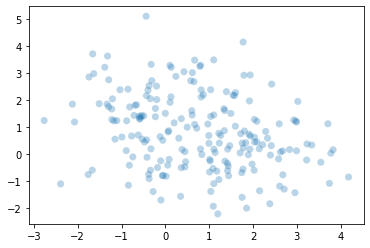

In [27]:
X = loadtxt('files/Class-Clusters.csv', delimiter=',')
scatter(X[:,0],X[:,1],s=50,alpha=0.3,edgecolor='none');
X.shape

Visualize the dataset via pairwise scatter plots.

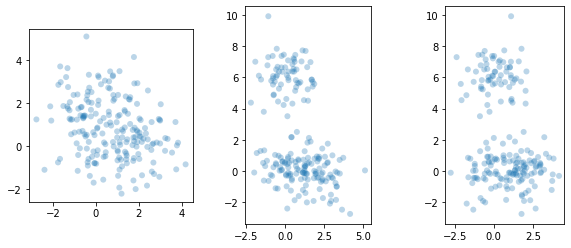

In [3]:
figure(figsize=(10,4))
for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
    ax=subplot(1,3,i, aspect='equal')
    scatter(X[:,m],X[:,n],alpha=0.3, edgecolor='none');

We run $k$-means for different numbers of clusters $k$.

In [28]:
from sklearn.cluster import KMeans
klist = []
ilist = []
centerslist = []
labelslist = []
k_max = 6
for k in range(1,k_max+1):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    klist.append(k)
    ilist.append(kmeans.inertia_) # cf. kmeans.score(X)
    centerslist.append(kmeans.cluster_centers_)
    labelslist.append(kmeans.labels_)

We visualize the resulting cluster memberships via the three scatter plots (colored by cluster assignment).

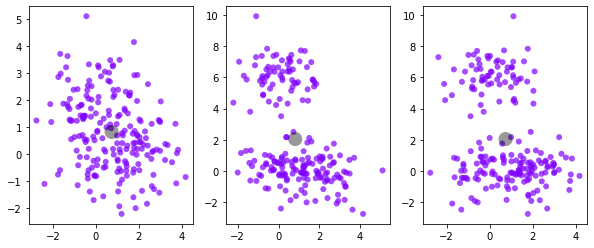

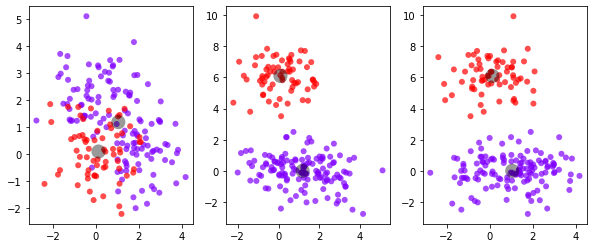

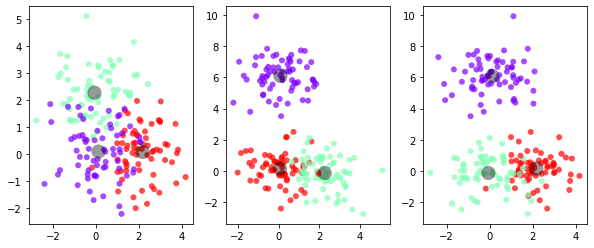

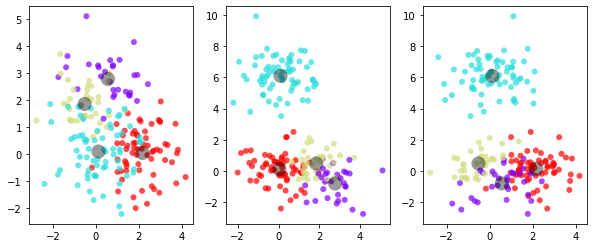

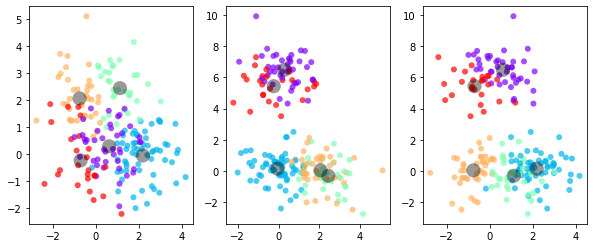

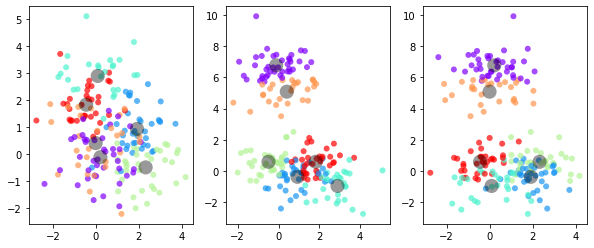

In [5]:
plt.close()
for k in range(1,k_max+1):
    C, L = centerslist[k-1], labelslist[k-1] 
    figure(figsize=(10,4))
    for i,m,n in [(1,0,1),(2,1,2),(3,0,2)]:
        ax=subplot(1,3,i) #,aspect='equal')
        scatter(X[:,m],X[:,n],c=L,cmap=cm.rainbow, alpha=0.7, edgecolor='none');
        scatter(C[:,m],C[:,n],c='k',marker='o',s=200,alpha=0.4,edgecolor='none');

Alternatively, we can also use 3d plots.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
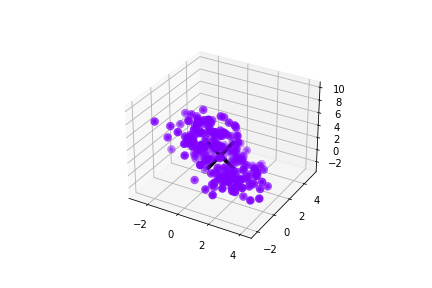

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
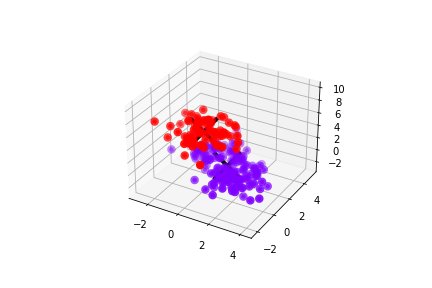

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
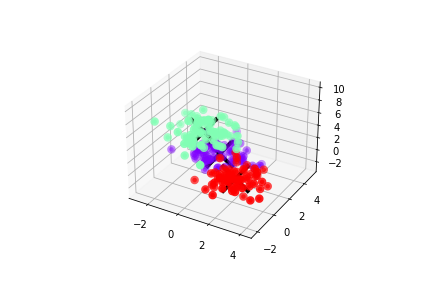

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
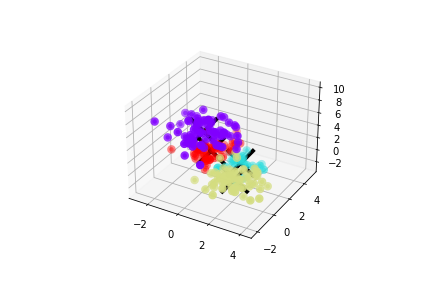

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
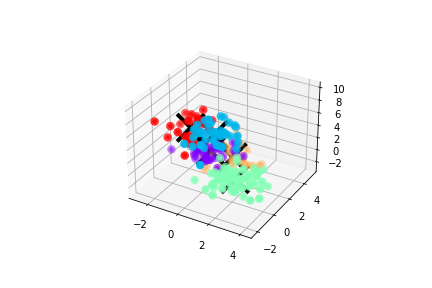

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
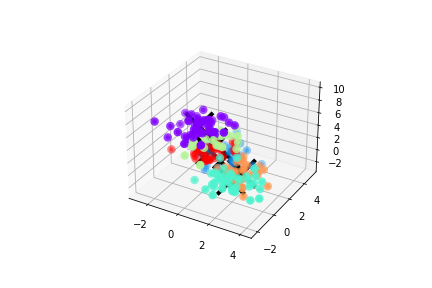

In [29]:
# %pip install ipympl 
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D


for k in range(1,k_max+1):
    C, L = centerslist[k-1], labelslist[k-1]
    fig = plt.figure() #(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    #for i, target_name in zip([0, 1, 2], iris.target_names):
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],cmap=cm.rainbow, 
                 lw=4,c=L,edgecolors='face')
    ax.scatter3D(C[:, 0], C[:, 1], C[:, 2],cmap=cm.rainbow, 
                 lw=4,c='k',marker='x',s=750,alpha=1)
    plt.show()

Based on the resulting *inertias*, i.e., the values of the $k$-means objective function, it is also possible to decide on a good choice of $k$:

Populating the interactive namespace from numpy and matplotlib


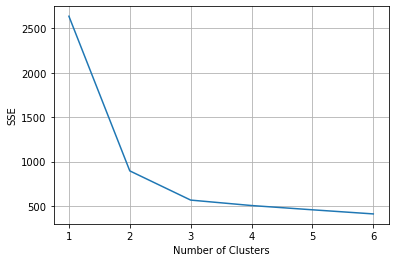

In [7]:
%pylab inline

plt.plot(klist,ilist)
plt.xticks(klist)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

In [8]:
# Elbow Method, package "kneed"
from kneed import KneeLocator
kl = KneeLocator( klist, ilist, curve="convex", direction="decreasing")

kl.elbow

2

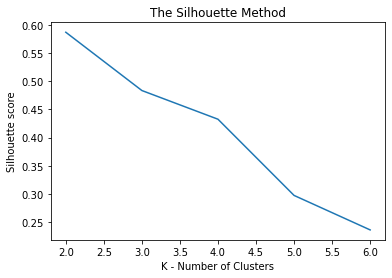

In [9]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 
    
for k in range(2,k_max+1):
    kmeans = KMeans(n_clusters=k, copy_x=False)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Lineplot using silhouette score
plt.plot(range(2,k_max+1), silhouette_scores) 
plt.xlabel('K - Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('The Silhouette Method') 
plt.show()

In [10]:
# For completeness, this was the code that created the dataset
from scipy.stats import norm
np.random.seed(seed=1)
x1 = norm.rvs(0, 0.99, size=(3, 66)); x1[0,:] += 2.1
x2 = norm.rvs(0, 0.99, size=(3, 67)); x2[1,:] += 2.1
x3 = norm.rvs(0, 0.99, size=(3, 67)); x3[2,:] += 6
Xtest = hstack((x1,x2,x3)).T.copy(order='C')
#savetxt("files/Class-Clusters.csv", X, delimiter=","); del X

- One limitation: assumes spherical clusters (use of distance function)

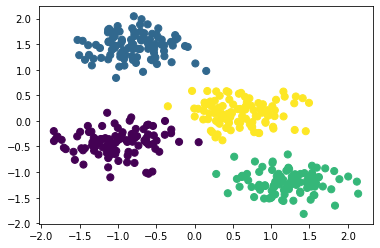

In [11]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# Generate some data
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Plot the data with K Means Labels
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

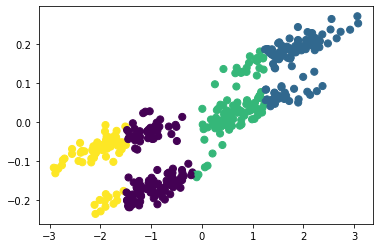

In [12]:
# make transformation
rng = np.random.RandomState(14)
X_stretched = np.dot(X_scaled, rng.randn(2, 2))

# Plot the data with K Means Labels
labels = KMeans(n_clusters=4, random_state=0).fit_predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels,s=50, cmap='viridis')
plt.show()

## Gaussian Mixture Models

- A probabilistic approach to clustering

> Infer the parameters of $k$ **components**

- For example, a mixture of two Gaussians ($k\!=\!2$)

> **Parameters** $\boldsymbol{\theta}$ are $(\mu_1,\Sigma_1),\ (\mu_2,\Sigma_2)$ and the<br>
> cluster membership probabilities $\boldsymbol{\pi}$ 


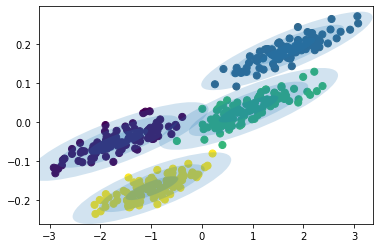

In [13]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

gmm = GaussianMixture(n_components=4).fit(X_stretched)
labels = gmm.predict(X_stretched)
fig = plt.figure()
ax = subplot(111)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels,s=50, cmap='viridis')

for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    w, v = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(v[0,1],v[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(w) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

## GMM with $k=2$


- Difficult because of the unknown cluster memberships $\boldsymbol{\kappa}$

> $\pi$ is the probability that an (arbitrary) data point belongs to component 1 <br>
> $(1\!-\!\pi)$ is the prob of belonging to component 2

- Likelihood function

>$\displaystyle L(\boldsymbol{\theta};\boldsymbol{x}) = \prod_{i=1}^n \Big[ \pi\, \mathcal{N}\left(x_i \vert\mu_1,\Sigma_1\right) + (1\!-\!\pi)\, \mathcal{N}\left(x_i\vert \mu_2,\Sigma_2\right)\Big]$
>
>$\displaystyle \hat\theta = \operatorname{argmax}\limits_{\theta} \log L(\boldsymbol{\theta};\boldsymbol{x}) = \operatorname{argmax} \limits_{\theta} \sum_{i=1}^n \log \Big[ \pi\, \mathcal{N}\left(x_i \vert\mu_1,\Sigma_1\right) + (1\!-\!\pi)\, \mathcal{N}\left(x_i\vert \mu_2,\Sigma_2\right)\Big] $
>
> However, direct maximization of $\log L(\boldsymbol{\theta};\boldsymbol{x})$ is quite difficult numerically, because of the sum of terms inside the logarithm.

- If we consider unobserved hidden/latent variables $z_i$, $z_i=0$ if $x_i$ belongs to component 1 and $z_i=1$ if $x_i$ belongs to component 2
> $\displaystyle \log L(\boldsymbol{\theta};\boldsymbol{x},\boldsymbol{z}) = \sum_{i=1}^n \Big[(1-z_i) \log (\pi)\, + (1-z_i) \log \mathcal{N}\left(x_i \vert\mu_1,\Sigma_1\right) \Big]+ \sum_{i=1}^n \Big[ z_i \log(1\!-\!\pi)\, + z_i \log \mathcal{N}\left(x_i\vert \mu_2,\Sigma_2\right)\Big]$


## Expectation-Maximization Algorithm

- The EM algorithm is a general framework

>1. Create an initial model $\boldsymbol{\theta}$
>2. Find a better $\boldsymbol{\theta}'$ s.t. <br> 
> the likelihood improves: $p(D\mid\boldsymbol{\theta}') > p(D\mid\boldsymbol{\theta})$ <br/> 
> (or the posterior)
>3. Repeat until convergence


## Step-by-step
<img src=http://orig02.deviantart.net/e551/f/2012/098/9/a/3_easy_steps_to_draw_mona_lisa____by_mcdaotri21-d4vhuu2.png align=left width=450>

## E-step

- Estimate the membership probabilities $\boldsymbol{\kappa}$

> Based on the current model $(\hat\pi,\hat\mu_1,\hat\mu_2,\hat\Sigma_1,\hat\Sigma_2)$ and data $\boldsymbol{x}$
>
> $\displaystyle \gamma_i(\boldsymbol{\theta}) = \mathbb{E}[z_i|\boldsymbol{\theta},x_i]= P(z_i = 1|\boldsymbol{\theta},x_i ) = \frac{P(z_i=1)P(x_i|\boldsymbol{\theta},z_i=1)}{P(z_i=0)P(x_i|\boldsymbol{\theta},z_i=0)+P(z_i=1)P(x_i|\boldsymbol{\theta},z_i=1)}$
>
> $\displaystyle \hat\gamma_i(\boldsymbol{\theta}) =  \frac{(1-\hat\pi)\mathcal{N}\left(x_i\vert \hat\mu_2,\hat\Sigma_2\right)}{\hat\pi\mathcal{N}\left(x_i\vert \hat\mu_1,\hat\Sigma_1\right) + (1-\hat\pi)\mathcal{N}\left(x_i\vert \hat\mu_2,\hat\Sigma_2\right)}$

## M-step

- Maximize the likelihood function  

> Based on the estimated membership probabilities $\boldsymbol{\kappa}$, obtain better $(\pi,\mu_1,\mu_2,\Sigma_1,\Sigma_2)$ estimates
>
> $\displaystyle \hat \mu_1 = \frac{\sum_{i=1}^n (1-\hat\gamma_i)x_i}{\sum_{i=1}^n (1-\hat\gamma_i)}$, $\displaystyle \hat \sigma_1^2 = \frac{\sum_{i=1}^n (1-\hat\gamma_i)(x_i-\hat\mu_1)^2}{\sum_{i=1}^n (1-\hat\gamma_i)}$
>
> $\displaystyle \hat \mu_2 = \frac{\sum_{i=1}^n \hat\gamma_i x_i}{\sum_{i=1}^n \hat\gamma_i}$, $\displaystyle \hat \sigma_1^2 = \frac{\sum_{i=1}^n \hat\gamma_i(x_i-\hat\mu_2)^2}{\sum_{i=1}^n \hat\gamma_i}$
>
> $\displaystyle \hat \pi = 1 - \frac{\sum_{i=1}^n \hat\gamma_i}{N}$
>
> The details of the calculations in the general case can be found in [Section 11.2 of Deisenroth, Faisal and Ong, “Mathematics for Machine Learning”, 2020](https://mml-book.github.io).


- In spirit, this is not completely unlike $k$-means clustering algorithm

## Visual Example

<!--
<img src=https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif align=left>
-->

<img src=https://upload.wikimedia.org/wikipedia/commons/a/a7/Em_old_faithful.gif align=left width=400>

### Another Approch of EM

- Jensen's inequality
> \begin{split}
\log L(\boldsymbol{\theta};\boldsymbol{x}) &= \sum_{i=1}^n \log p(x_i \vert \boldsymbol{\theta}) =  \sum_{i=1}^n \log\left( \sum_{i=1}^k p(x_i,z_i=k \vert \boldsymbol{\theta})\right) = \sum_{i=1}^n \log\left( \sum_{k=1}^K q_i^{(k)} \frac{p(x_i,z_i=k \vert \boldsymbol{\theta})}{q_i^{(k)}}\right) \\
&\geq \sum_{i=1}^n \sum_{k=1}^K q_i^{(k)} \log \left(\frac{p(x_i,z_i=k \vert \boldsymbol{\theta})}{q_i^{(k)}}\right) 
\end{split}
>
> where $\displaystyle q_i^{(k)} = p(z_i = k \vert x_i, \boldsymbol{\theta}^{(t)})$

-  lower bound function

> $\displaystyle Q(\boldsymbol{\theta},\boldsymbol{\theta}^{(t)}):=  \sum_{i=1}^n \sum_{k=1}^K q_i^{(k)} \log \left(\frac{p(x_i,z_i=k \vert \theta)}{q_i^{(k)}}\right) = \sum_{i=1}^n \mathbb{E}_{z_i \vert x_i, \theta^{(t)}}\left[\log p(x_i,z_i \vert \boldsymbol{\theta}) \right] + \sum_{i=1}^n \mathbb{H}(q_i)$
>
> with the definition of the *entropy* $\mathbb{H}(q) = - \sum_{k=1}^K q^{(k)} \log(q^{(k)})$, which fulfills
$$
\log L(\boldsymbol{\theta}) \geq Q(\boldsymbol{\theta},\boldsymbol{\theta}^{(t)}).
$$

- 1. **E-step (Expectation):** Define the expectation $\sum_{i=1}^n \mathbb{E}_{z_i \vert x_i, \boldsymbol{\theta}^{(t)}}\left[\log p(x_i,z_i \vert \boldsymbol{\theta}) \right]$ of the log-likelihood of the data set with respect to the current conditional distribution of the $z_i$ given $x_i$ and $\theta^{(t)}$. Up to a constant that does not depend on $\boldsymbol{\theta}$, this corresponds to $Q(\theta,\theta^{(t)})$, and computation of $q_i^{(k)} = p(z_i = k \vert x_i, \boldsymbol{\theta}^{(t)})$.


- 2. **M-step (Maximization):** Find the parameter 
  $$
  \boldsymbol{\theta}^{(t+1)} = \operatorname{argmax}\limits_{\theta} \sum_{i=1}^n \mathbb{E}_{z_i \vert x_i, \boldsymbol{\theta}^{(t)}}\left[\log p(x_i,z_i \vert \boldsymbol{\theta}) \right].
  $$
  As they differ just by a constant, we see that $\boldsymbol{\theta}^{(t+1)} = \operatorname{argmax}\limits_ {\boldsymbol{\theta}}Q(\boldsymbol{\theta},\boldsymbol{\theta}^{(t)})$.


- Using the properties above, it follows that
$$
\log L(\boldsymbol{\theta}^{(t+1)}) \geq Q(\boldsymbol{\theta}^{(t+1)},\boldsymbol{\theta}^{(t)}) \geq Q(\boldsymbol{\theta}^{(t)},\boldsymbol{\theta}^{(t)}) = \log L(\boldsymbol{\theta}^{(t)})
$$
for each iteration $t$, which confirms that we have obtained an algorithm that locally maximizes the log-likelihood.


- Note that it is _not_ clear that the EM algorithm will always find the global optimum, i.e., the maximum likelihood estimator. In general, EM only finds a local maximum, but not a global one.

## Iris

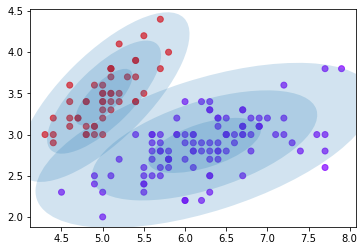

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn import datasets
from matplotlib.patches import Ellipse

iris = datasets.load_iris()
X = iris.data[:,:2] # only 2 features

gmm = GaussianMixture(n_components=2)
gmm.fit(X)
Cpred = gmm.predict(X)
fig = plt.figure()
ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=Cpred, cmap=cm.rainbow, alpha=0.7)

for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    w, v = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(v[0,1],v[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(w) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

In [15]:
vars(gmm)

{'n_components': 2,
 'tol': 0.001,
 'reg_covar': 1e-06,
 'max_iter': 100,
 'n_init': 1,
 'init_params': 'kmeans',
 'random_state': None,
 'warm_start': False,
 'verbose': 0,
 'verbose_interval': 10,
 'covariance_type': 'full',
 'weights_init': None,
 'means_init': None,
 'precisions_init': None,
 'n_features_in_': 2,
 'converged_': True,
 'weights_': array([0.67759418, 0.32240582]),
 'means_': array([[6.23681457, 2.86828732],
        [5.01636129, 3.45464774]]),
 'covariances_': array([[[0.46802531, 0.1265564 ],
         [0.1265564 , 0.11159768]],
 
        [[0.11970632, 0.08818318],
         [0.08818318, 0.11781812]]]),
 'precisions_cholesky_': array([[[ 1.46172384, -0.97210038],
         [ 0.        ,  3.59497877]],
 
        [[ 2.89029026, -3.20418822],
         [ 0.        ,  4.34960011]]]),
 'precisions_': array([[[  3.08161574,  -3.49468023],
         [ -3.49468023,  12.92387236]],
 
        [[ 18.62059992, -13.93693741],
         [-13.93693741,  18.91902108]]]),
 'n_iter_': 11,
 

In [16]:
Cpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

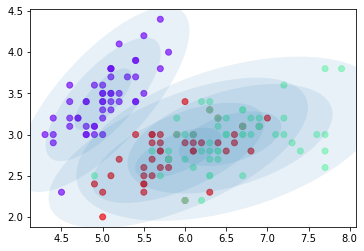

In [17]:
# cluster on all features w/ plotting another projection
X = iris.data[:,:] 

gmm = GaussianMixture(n_components=3)
gmm.fit(X)
Cpred = gmm.predict(X)

fig = plt.figure()
ax = subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    scatter(X[:,0], X[:,1], c=iris.target, cmap=cm.rainbow, alpha=0.7) 
else:
    scatter(X[:,0], X[:,1], c=Cpred, cmap=cm.rainbow, alpha=0.7) 
    
for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][:2,:2] 
    w, v = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(v[0,1],v[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(w) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

In [18]:
vars(gmm)

{'n_components': 3,
 'tol': 0.001,
 'reg_covar': 1e-06,
 'max_iter': 100,
 'n_init': 1,
 'init_params': 'kmeans',
 'random_state': None,
 'warm_start': False,
 'verbose': 0,
 'verbose_interval': 10,
 'covariance_type': 'full',
 'weights_init': None,
 'means_init': None,
 'precisions_init': None,
 'n_features_in_': 4,
 'converged_': True,
 'weights_': array([0.33333333, 0.36539575, 0.30127092]),
 'means_': array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [6.54639415, 2.94946365, 5.48364578, 1.98726565],
        [5.9170732 , 2.77804839, 4.20540364, 1.29848217]]),
 'covariances_': array([[[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
         [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
         [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
         [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],
 
        [[0.38744093, 0.09223276, 0.30244302, 0.06087397],
         [0.09223276, 0.11040914, 0.08385112, 0.05574334],
         [0.30244302, 0.08385112, 0.3258957

In [19]:
gmm.covariances_[0].shape

(4, 4)

In [20]:
gmm.predict(X)[:5]

array([0, 0, 0, 0, 0])

In [21]:
gmm.predict_proba(X)[-20:]

array([[6.59920196e-190, 9.99999947e-001, 5.31371484e-008],
       [4.84016429e-201, 9.93212689e-001, 6.78731078e-003],
       [7.00381420e-169, 1.00000000e+000, 7.54737561e-014],
       [2.78240437e-113, 7.59590251e-001, 2.40409749e-001],
       [3.68184461e-138, 9.99964168e-001, 3.58320114e-005],
       [2.64332131e-207, 1.00000000e+000, 4.66646487e-014],
       [7.75467719e-175, 1.00000000e+000, 6.57275190e-013],
       [2.16982135e-141, 9.97026854e-001, 2.97314624e-003],
       [1.04881498e-107, 9.93150749e-001, 6.84925074e-003],
       [8.56493816e-152, 9.99999879e-001, 1.20519246e-007],
       [2.46909862e-178, 1.00000000e+000, 2.67886792e-016],
       [2.12289312e-148, 1.00000000e+000, 6.83181985e-014],
       [1.76688867e-128, 9.99999839e-001, 1.61298920e-007],
       [1.29599669e-187, 1.00000000e+000, 8.14326126e-012],
       [9.34722631e-188, 1.00000000e+000, 5.22971862e-017],
       [1.13909773e-153, 1.00000000e+000, 6.34854022e-015],
       [3.44470050e-127, 9.99999996e-001

In [22]:
gmm.score(X)

-1.2013110850984177

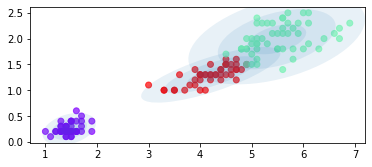

In [23]:
# plot another projections of the 4-D space
fig = plt.figure()
ax = subplot(111, aspect='equal')
if False: # coloring by the true class memberships
    scatter(X[:,2], X[:,3], c=iris.target, cmap=cm.rainbow, alpha=0.7) 
else:
    scatter(X[:,2], X[:,3], c=Cpred, cmap=cm.rainbow, alpha=0.7) 
    
for n in arange(gmm.n_components): 
    cov = gmm.covariances_[n][2:,2:] 
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4): # of contours
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,2:], a[0],a[1], angle)
        ell.set_alpha(0.1)
        ax.add_artist(ell)

- What k?

> $\displaystyle \mathrm {BIC} =k\ln(n)-2\ln({\hat {L}}).\ $
>
> $\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})$
>
> $k$ is the number of estimated parameters in the model, and $\hat {L}$ is the maximum value of the likelihood function for the model

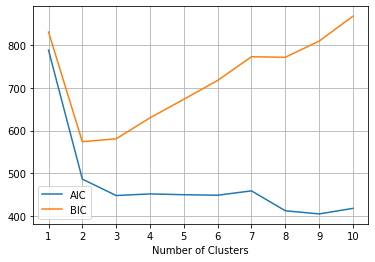

In [24]:
AICs = []
BICs = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    AICs.append(gmm.aic(X))
    BICs.append(gmm.bic(X))
    
plt.plot(range(1, 11), AICs, label = 'AIC')
plt.plot(range(1, 11), BICs, label = 'BIC')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.legend(loc='best')
plt.grid()
plt.show()

## What Gaussian?

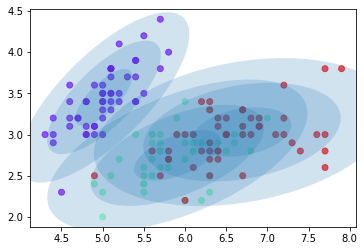

In [25]:
X = iris.data[:,:2]
fig = plt.figure()
ax = subplot(111, aspect='equal')
scatter(X[:,0], X[:,1], c=iris.target, cmap=cm.rainbow, alpha=0.7)

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)

for n in arange(gmm.n_components): 
    if gmm.covariance_type == 'spherical': cov = eye(X.shape[1])*gmm.covariances_[n]
    elif gmm.covariance_type == 'full': cov = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied': cov = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag': cov = diag(gmm.covariances_[n][:2])
    v, w = np.linalg.eigh(cov)
    angle = 180/pi * arctan2(w[0,1],w[0,0])
    for i in range(1,4):
        a = 2*i*np.sqrt(v) 
        ell = Ellipse(gmm.means_[n,:2], a[0],a[1], angle)
        ell.set_alpha(0.2)
        ax.add_artist(ell)

## Variants

<img src=https://scikit-learn.org/0.15/_images/plot_gmm_classifier_0011.png align=left width=400>

<!--<img src=files/plot_gmm_classifier_0011.png align=left width=400>-->


## Decision Boundaries

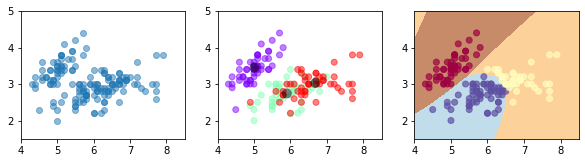

In [26]:
X = iris.data[:,:2] # only 2 features
x_min, x_max = 4, 8.5
y_min, y_max = 1.5, 5

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(X)
C = gmm.means_

fig=figure(figsize=(10,4)); 
ax=subplot(131,aspect='equal')
scatter(X[:,0],X[:,1], alpha=0.5);
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax=subplot(132,aspect='equal')
scatter(X[:,0],X[:,1],c=iris.target,cmap=cm.rainbow, alpha=0.5);
scatter(C[:,0],C[:,1],c='k',marker='o',s=100,alpha=0.5,edgecolor='none');
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

if True:
    h = .005 # point in the mesh [x_min, m_max]x[y_min, y_max].
    # Plot the decision boundary. For that, we will assign a color to each
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    P = gmm.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Put the result into a color plot
    ax=subplot(133,aspect='equal')
    plt.imshow(P, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='equal', origin='lower', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), alpha=0.7, cmap=cm.Spectral_r)

## Comparison

- Gaussian Mixture Model

> Find components with matching distribution

- $k$-means clustering

> Tends to yield spherical clusters with similar sizes

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/ClusterAnalysis_Mouse.svg/675px-ClusterAnalysis_Mouse.svg.png" width=600 align=left>

## Soft Clustering?

- GMM provides quality to each possible cluster membership

> Instead of just in/out, have the likelihoods for all


## More Clustering

- Read and learn about the following algorithms:

> Agglomerative clustering
> <br>
> DBSCAN

- Overview of clustering on sklearn

> Read more [here](http://scikit-learn.org/stable/modules/clustering.html)

## Next Topic

- Spectral Clustering!